In [451]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

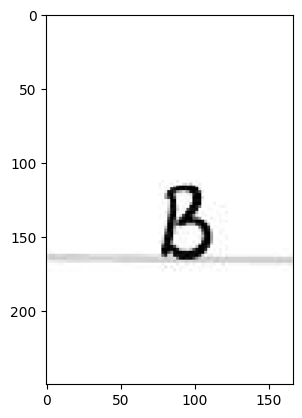

In [452]:
# Path to the JPG image
image_path = "C:\\Users\\tvogt\\OneDrive\\Dokumente\\FH_Dortmund\\Master-Studienarbeit\\BuchstabenInput\\B.png"
capital_letter = 1

# Open the image
image = Image.open(image_path)

# Display the image in jupyter notebook
plt.imshow(image)
plt.show()

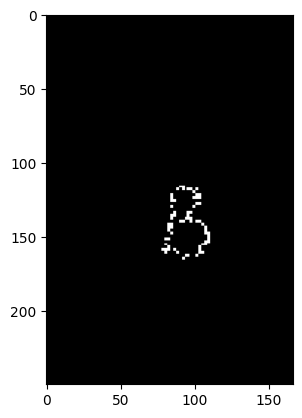

In [453]:
# Convert the image to a NumPy array
image_array = np.array(image)

# Extract the color channels (Red, Green, Blue, Alpha)
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]
alpha_channel = image_array[:, :, 3]

# Create a binary image by selecting only the black pixels
binary_image = (red_channel == 0) & (green_channel == 0) & (blue_channel == 0) & (alpha_channel != 0)
# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.show()


In [454]:

# Determine the y-zero line based on the gray line in the original image
y_zero_line = np.argmax(np.sum(binary_image, axis=1) > 0)

y_zero_line = 30
print(y_zero_line)


30


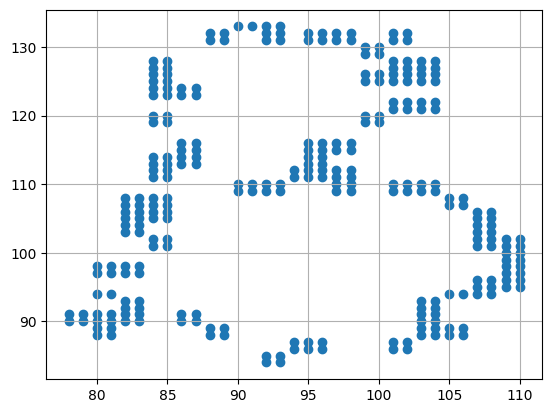

In [455]:

# Flip the image vertically
flipped_image = np.flipud(binary_image)

# Extract the x and y coordinates of the letter A
coords = np.argwhere(flipped_image)
x_coords = coords[:, 1]
y_coords = coords[:, 0]

# Display the letter A in the coordinate system
plt.scatter(x_coords, y_coords)

# Display the grid in the coordinate system
plt.grid(True)

# Show the image
plt.show()

# Print the points in the coordinate system
# for point in zip(x_coords, y_coords):
#     print(point)


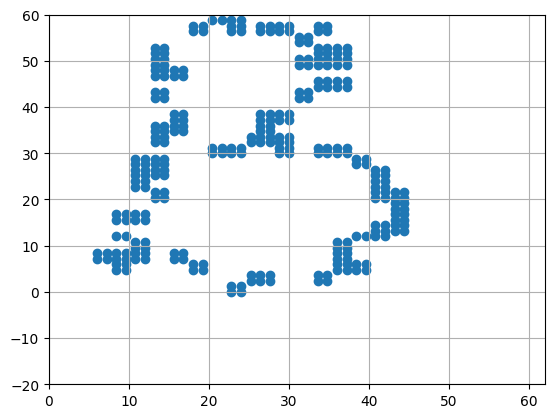

In [456]:
min_x = float('inf')
min_y = float('inf')
max_y = 0

# Find den rechtesten Punkt und den untersten Punkt
for coord in coords:
    y, x = coord
    if x < min_x:
        min_x = x
    if y < min_y:
        min_y = y


# Verschiebe und spiegle die Koordinatenpunkte entsprechend
adjusted_coordinates = []
for coord in coords:
    y, x = coord
    adjusted_x = 5 + (x - min_x)
    adjusted_y = (y - min_y)
    adjusted_coordinates.append((adjusted_x, adjusted_y))

for coord in adjusted_coordinates:
    x, y = coord
    if y > max_y:
        max_y = y

if capital_letter == 1:
    max = 58
else:
    max = 38
zoom = max / max_y
zoom = round(zoom, 1)

adjusted_coordinates_new = []
for coord in adjusted_coordinates:
    x, y = coord
    adjusted_x = x * zoom
    adjusted_y = y * zoom
    adjusted_coordinates_new.append((round(adjusted_x, 2), round(adjusted_y, 2)))


# Plot the adjusted coordinates
x_coords, y_coords = zip(*adjusted_coordinates_new)
plt.scatter(x_coords, y_coords)
plt.ylim(-20, 60)
plt.xlim(0, 62)
plt.grid(True)
plt.show()

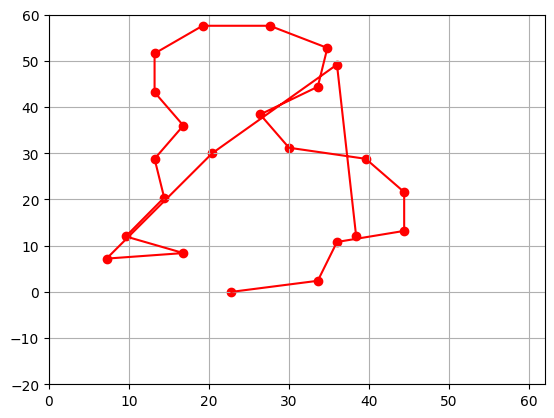

In [457]:
# Koordinatenpunkte
coords = list(zip(x_coords, y_coords))

# Berechnung des Abstands zwischen zwei Punkten
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Finde den nächsten Punkt basierend auf dem Abstand
def find_nearest_point(point, available_points):
    distances = [calculate_distance(point, p) for p in available_points]
    min_distance_idx = np.argmin(distances)
    return available_points.pop(min_distance_idx)

# Erstelle die neue Reihenfolge der Punkte
new_order = [coords[0]]  # Startpunkt
remaining_points = coords[1:]  # Verbleibende Punkte

while remaining_points:
    last_point = new_order[-1]
    nearest_point = find_nearest_point(last_point, remaining_points)
    new_order.append(nearest_point)

# Konvertiere die neuen Reihenfolgepunkte zurück in separate x- und y-Koordinaten
new_x_coords, new_y_coords = zip(*new_order)

# Definiere den threshold Abstand
threshold = 8

# Überspringe nahe beieinander liegende Punkte
filtered_coords = [new_order[0]]
for i in range(1, len(new_order)):
    distance = calculate_distance(new_order[i], filtered_coords[-1])
    if distance >= threshold:
        filtered_coords.append(new_order[i])

# Konvertiere die gefilterten Punkte zurück in separate x- und y-Koordinaten
filtered_x_coords, filtered_y_coords = zip(*filtered_coords)

# Plotte die gefilterten Punkte und die verbundenen Linien
plt.scatter(filtered_x_coords, filtered_y_coords, c='r')
plt.plot(filtered_x_coords, filtered_y_coords, c='r')

# Setze die Grenzen des Koordinatensystems
plt.ylim(-20, 60)
plt.xlim(0, 62)

# Zeige das Gitter im Koordinatensystem
plt.grid(True)

# Zeige das Bild an
plt.show()



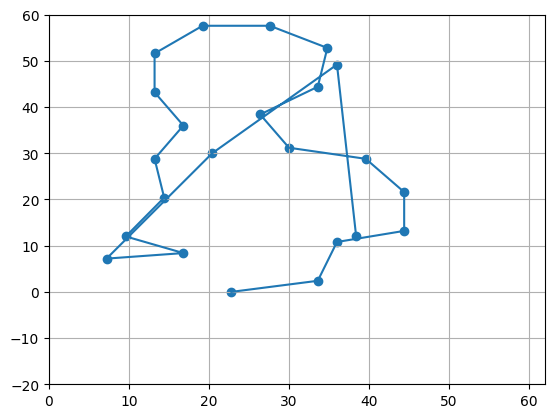

In [458]:
threshold = 2 # Schwellenwert

cleaned_coordinates = list(filtered_coords)

for i, (x, y) in enumerate(filtered_coords):
    for j in range(i + 1, len(filtered_coords)):
        x_next, y_next = filtered_coords[j]
        if x_next == x:
            distance = abs(y - y_next)
            if distance <= threshold:
                try:
                    cleaned_coordinates.remove((x_next, y_next))
                except ValueError:
                    pass

# Plotte die bereinigten Koordinatenpunkte
# print(type(cleaned_coordinates))
# print(cleaned_coordinates)


cleaned_x_coords, cleaned_y_coords = zip(*cleaned_coordinates)
plt.scatter(cleaned_x_coords, cleaned_y_coords)
plt.plot(cleaned_x_coords, cleaned_y_coords)
plt.ylim(-20, 60)
plt.xlim(0, 62)
plt.grid(True)
plt.show()


['C', 65, 50]
['P', 25, 52]
['L', 5, 0]
['P', 25, 52]
['L', 45, 0]
['P', 12, 17]
['L', 37, 17]
[(25, 52), (5, 0), (25, 52), (45, 0), (12, 17), (37, 17)]
[(22.8, 0.0), (24.0, 0.0), (22.8, 1.2), (24.0, 1.2), (25.2, 2.4), (26.4, 2.4), (27.6, 2.4), (33.6, 2.4), (34.8, 2.4), (25.2, 3.6), (26.4, 3.6), (27.6, 3.6), (33.6, 3.6), (34.8, 3.6), (8.4, 4.8), (9.6, 4.8), (18.0, 4.8), (19.2, 4.8), (36.0, 4.8), (37.2, 4.8), (38.4, 4.8), (39.6, 4.8), (8.4, 6.0), (9.6, 6.0), (18.0, 6.0), (19.2, 6.0), (36.0, 6.0), (37.2, 6.0), (38.4, 6.0), (39.6, 6.0), (6.0, 7.2), (7.2, 7.2), (8.4, 7.2), (9.6, 7.2), (10.8, 7.2), (12.0, 7.2), (15.6, 7.2), (16.8, 7.2), (36.0, 7.2), (37.2, 7.2), (6.0, 8.4), (7.2, 8.4), (8.4, 8.4), (9.6, 8.4), (10.8, 8.4), (12.0, 8.4), (15.6, 8.4), (16.8, 8.4), (36.0, 8.4), (37.2, 8.4), (10.8, 9.6), (12.0, 9.6), (36.0, 9.6), (37.2, 9.6), (10.8, 10.8), (12.0, 10.8), (36.0, 10.8), (37.2, 10.8), (8.4, 12.0), (9.6, 12.0), (38.4, 12.0), (39.6, 12.0), (40.8, 12.0), (42.0, 12.0), (40.8, 13.2), (42.

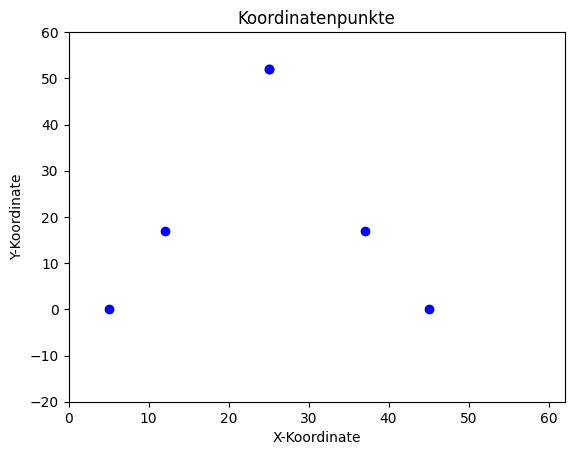

In [459]:
A = [['C', 65, 50], ['P', 25, 52], ['L', 5, 0], ['P', 25, 52], ['L', 45, 0], ['P', 12, 17], ['L', 37, 17]]
B = [['C', 66, 50], ['P', 7, 52], ['L', 7, 0], ['P', 7, 52], ['L', 30, 52], ['L', 37, 50], ['L', 40, 47], ['L', 42, 42], ['L', 42, 37], ['L', 40, 32], ['L', 37, 30], ['L', 30, 27], ['P', 7, 27], ['L', 30, 27], ['L', 37, 25], ['L', 40, 22], ['L', 42, 17], ['L', 42, 10], ['L', 40, 5], ['L', 37, 2], ['L', 30, 0], ['L', 7, 0]]
#print(A[0][1])

perfect_coords = []

for coordinate in A:
    print(coordinate)
    if coordinate[0] == 'P' or coordinate[0] == 'L':
        x = coordinate[1]
        y = coordinate[2]
        coords = (x,y)
        perfect_coords.append(coords)
print(perfect_coords)
print(adjusted_coordinates_new)

perfect_x_coords = [coord[0] for coord in perfect_coords]
perfect_y_coords = [coord[1] for coord in perfect_coords]

plt.scatter(perfect_x_coords, perfect_y_coords, color='blue')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.ylim(-20, 60)
plt.xlim(0, 62)
plt.title('Koordinatenpunkte')
plt.show()


In [460]:
def find_closest_coordinates(found_coords, perfect_coords):
    letter_coords = []
    
    for perfect_coord in perfect_coords:
        closest_coord = None
        min_distance = float('inf')
        
        for coord in found_coords:
            distance = math.sqrt((perfect_coord[0] - coord[0])**2 + (perfect_coord[1] - coord[1])**2)
            
            if distance < min_distance:
                min_distance = distance
                closest_coord = coord
        
        letter_coords.append(closest_coord)
    
    return letter_coords

In [461]:
letter_coords = find_closest_coordinates(adjusted_coordinates_new, perfect_coords)
print(letter_coords)

[(24.0, 56.4), (8.4, 4.8), (24.0, 56.4), (39.6, 4.8), (12.0, 16.8), (40.8, 14.4)]


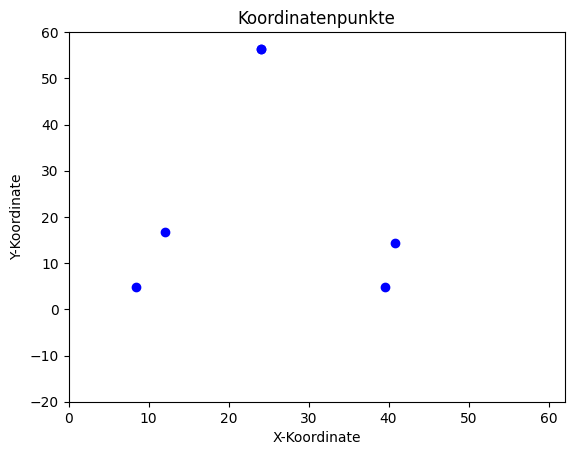

In [462]:
letter_x_coords = [coord[0] for coord in letter_coords]
letter_y_coords = [coord[1] for coord in letter_coords]

plt.scatter(letter_x_coords, letter_y_coords, color='blue')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.ylim(-20, 60)
plt.xlim(0, 62)
plt.title('Koordinatenpunkte')
plt.show()

In [463]:
# letter_coords_with_letters = [(letter, coord[0], coord[1]) for letter, coord in zip([item[0] for item in B], letter_coords)]
letter_coords_with_letters = [(item[0], coord[0], coord[1]) for item, coord in zip(B, letter_coords)]
letter_coords_with_letters_better = [tuple(A[0])] + [(item[0], coord[0], coord[1]) for item, coord in zip(A[1:], letter_coords)]



print(letter_coords_with_letters)
print(letter_coords_with_letters_better)

[('C', 24.0, 56.4), ('P', 8.4, 4.8), ('L', 24.0, 56.4), ('P', 39.6, 4.8), ('L', 12.0, 16.8), ('L', 40.8, 14.4)]
[('C', 65, 50), ('P', 24.0, 56.4), ('L', 8.4, 4.8), ('P', 24.0, 56.4), ('L', 39.6, 4.8), ('P', 12.0, 16.8), ('L', 40.8, 14.4)]
